<a href="https://colab.research.google.com/github/Manjunath727/DLwithTF/blob/master/CNN_Using_TF/W1/l1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using sophisticated dataset with ConvNet

Fashion MNIST or MNIST dataset have limitation of being the same size images and monochrome. In real world, images are usually of different shapes, different aspect ratios and mostly in color.

So we shall process the images, not just resize.

Following are the steps involved :


1.   Explore the image dataset ( cats and dogs )
2.   Build and Train the neural network to recognize the difference between two.
3.   Evaluate the training and validation accuracy.




##Explore the image dataset

Download 2000 JPEG pictures of cats and dogs. And extract it locally in /tmp

Note : Cats and Dogs dataset in Kaggle ( https://www.kaggle.com/c/dogs-vs-cats/data )is of size 25000 images. We use a subset in order to reduce the training time


In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip


--2019-07-04 21:33:05--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   203MB/s    in 0.3s    

2019-07-04 21:33:06 (203 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Access the filesystem and use the zipfile library to unzip the data

In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

The unzip contents of .zip file are arranged as below -

- /tmp/cats_and_dogs_filtered

  -- train
    - cats
    - dogs
    
  -- validation
    - cats
    - dogs

ImageGenerator is coded to read images from sub-directories, and automatically label them from the name of that directory. 

Let's define these directories-
  
    


In [0]:
base_dir = '/tmp/cats_and_dogs_filtered/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


Sample look of the file names in train diectories.
Also printing the no. of files in the directories.

In [5]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))

['cat.919.jpg', 'cat.254.jpg', 'cat.790.jpg', 'cat.40.jpg', 'cat.231.jpg', 'cat.58.jpg', 'cat.843.jpg', 'cat.384.jpg', 'cat.744.jpg', 'cat.261.jpg']
['dog.647.jpg', 'dog.528.jpg', 'dog.523.jpg', 'dog.544.jpg', 'dog.196.jpg', 'dog.67.jpg', 'dog.485.jpg', 'dog.794.jpg', 'dog.916.jpg', 'dog.596.jpg']
1000
1000
500
500


Have a look at some of the pictures using matplotlib


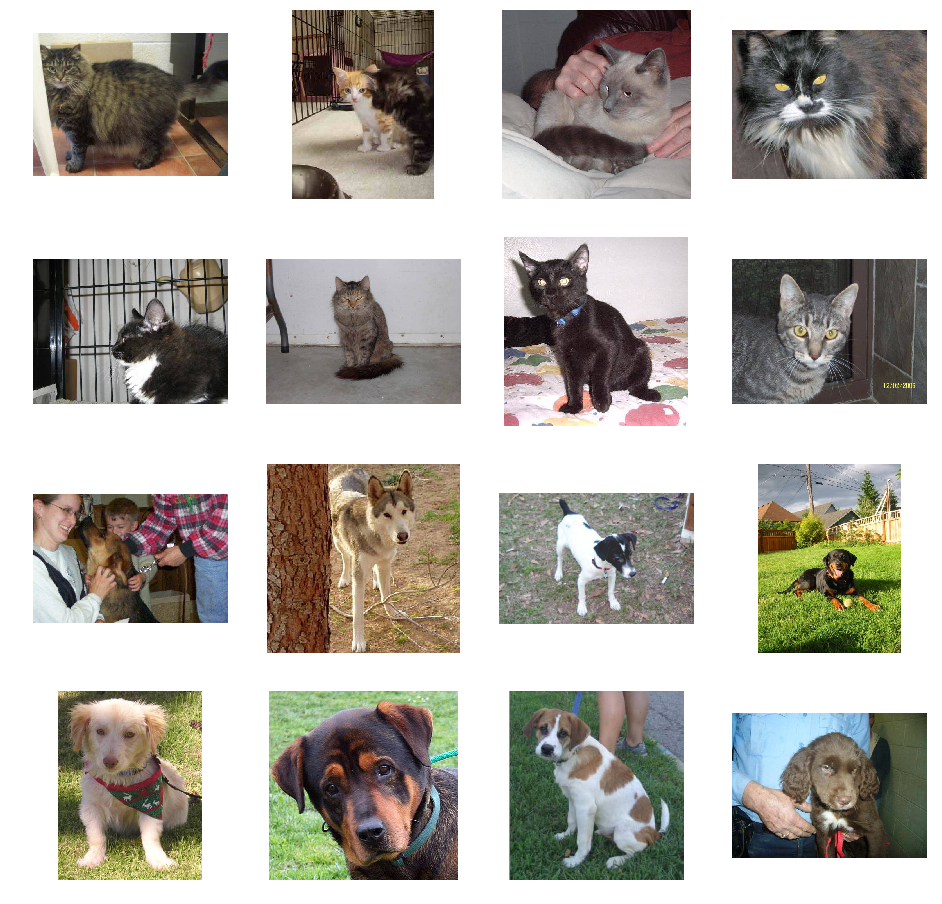

In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Display a batch of 8 cats and 8 dogs pictures
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_cat_pix = [ os.path.join(train_cats_dir, fname) 
                  for fname in train_cat_fnames[pic_index-8:pic_index]
                 ]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                  for fname in train_dog_fnames[pic_index-8:pic_index]
                 ]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  # Setup the subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  
  img = mpimg.imread(img_path)
  plt.imshow(img)
  
plt.show()

## Build a Simple ConvNet and Train

To train images on a neural net, images need to of same sizes. Here we choose 150x150

So the input image size will be 150 x 150 x 3 ( 3 because of color image)

Sequential layer  =  Couple of Convolutional layers + Flatten + Dense Layers


In [7]:
# Build the model

import tensorflow as tf

model = tf.keras.models.Sequential([
    # Input shape that is desired is 150x150
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the result to feed into DNN
    tf.keras.layers.Flatten(),
    
    # 512 hidden layers
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Only 1 output neuron.
    tf.keras.layers.Dense(1, activation='sigmoid')
])

W0704 21:33:11.004745 140693238175616 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [9]:
# Train the model. 

# Since this is a binary_classification problem, we'll train our model with
# binary_cross_entropy loss function. And we'll use RMSProp as optimizer

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), 
              loss='binary_crossentropy',
              metrics=['acc'])

W0704 21:33:11.475766 140693238175616 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Data Preprocessing

Setup data generators to read images from the source folders, convert them to float32 tensors and feed them to ConvNet. Generators yield a batch of 20 images of size 150x150 and their labels

Data is normalized to make it more amenable to processing by the network. Here image pixel values are normalized to be in range of [0,1]

In keras this can be done by `keras.preprocessing.image.ImageDataGenerator` class using `rescale` parameter. The image generator instantiates generators of augmented batches via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with Keras model methods that accept data generators as inputs: `fit_generator`, `evaluate_generator` and `predict_generator`.


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size = (150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode = 'binary',
                                                        target_size = (150,150))
  

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Training

Train on all 2000 images for 15 epochs and validate on all 1000 test images
Do note four values per epoch - Loss, Accuracy, Validation loss, Validation accuracy


In [11]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 61s - loss: 0.7828 - acc: 0.5670 - val_loss: 0.6342 - val_acc: 0.6410
Epoch 2/15
100/100 - 59s - loss: 0.6415 - acc: 0.6735 - val_loss: 0.5984 - val_acc: 0.6890
Epoch 3/15
100/100 - 59s - loss: 0.5294 - acc: 0.7405 - val_loss: 0.5571 - val_acc: 0.6940
Epoch 4/15
100/100 - 59s - loss: 0.4524 - acc: 0.7920 - val_loss: 0.5383 - val_acc: 0.7300
Epoch 5/15
100/100 - 59s - loss: 0.3691 - acc: 0.8345 - val_loss: 0.6014 - val_acc: 0.7280
Epoch 6/15
100/100 - 59s - loss: 0.2921 - acc: 0.8800 - val_loss: 0.6727 - val_acc: 0.7190
Epoch 7/15
100/100 - 59s - loss: 0.1985 - acc: 0.9200 - val_loss: 0.8414 - val_acc: 0.7090
Epoch 8/15
100/100 - 59s - loss: 0.1345 - acc: 0.9450 - val_loss: 1.0460 - val_acc: 0.7230
Epoch 9/15
100/100 - 59s - loss: 0.0904 - acc: 0.9690 - val_loss: 1.0792 - val_acc: 0.7330
Epoch 10/15
100/100 - 59s - loss: 0.0694 - acc: 0.9800 - val_loss: 1.4934 - val_acc: 0.6840
Epoch 11/15
100/100 - 59s - loss: 0.0825 - acc: 0.9780 - val_loss: 2.4223 - val_acc: 0.63

## Running the model on local

We can choose multiple files, upload them and run them through model.  We should be able to classify the local images


In [12]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  
  # predicted images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150,150))
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0] > 0:
    print(fn + ' is a dog')
  else:
    print(fn + ' is a cat')

Using TensorFlow backend.


##Visualizing intermediate representations

Fun thing to do is to visualize how an input gets transformed as it goes through ConvNet


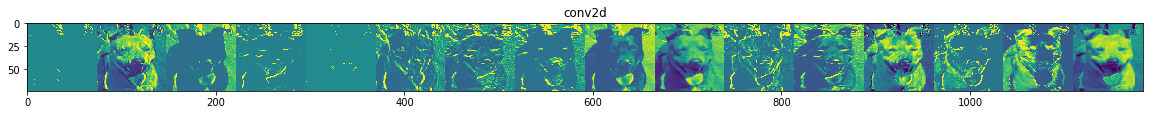

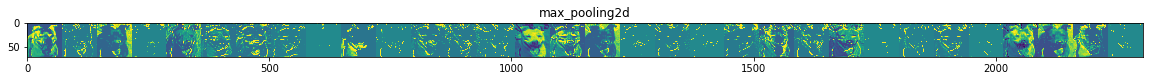

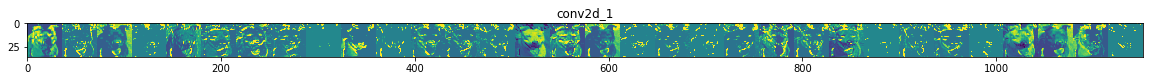

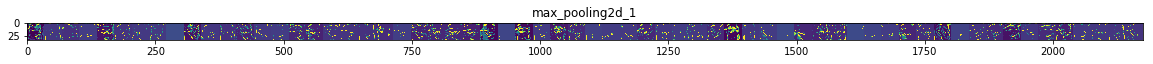

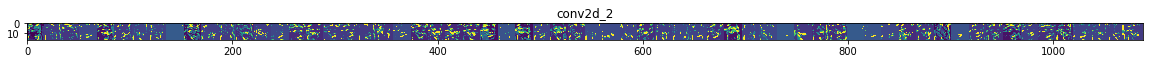

In [13]:
import numpy as np
import random

from tensorflow.keras.preprocessing.image import img_to_array, load_img

# First define a model that will take an image as an input and output
# intermediate representations for all the layers in the previous model
# after the first

successive_outputs = [layer.output for layer in model.layers[1:]]

# Visualization model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image of a cat and a dog from the training set
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150,150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, obtaining all intermediate representations of image
successive_feature_maps = visualization_model.predict(x)

# Can have layer names as a part of the plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if (len(feature_map.shape) == 4):
    # Just do this for the conv / maxpool layers, not fully-connected layers
    n_features = feature_map.shape[-1] # no. of features in the feature_map
    size       = feature_map.shape[1] # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features ))
    
    # Postprocess the feature to be visually feature
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    # Display the grid

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 
    


In the above visualization model, we observe we go through from raw pixels to increasingly abstract and compact representations. It shows what the network pays attention to and show fewer and fewer features being activated, most are set to zero.
This is called sparsity.  

These reprentations carry increasingly less information about the original pixels, but increasingly refined information about the class of the image.

## Evaluating loss and accurancy for the model

Next we plot the training and validation sets accuracy and loss as collected during the training

<Figure size 432x288 with 0 Axes>

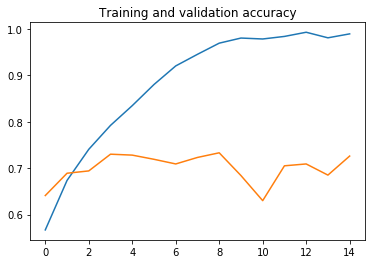

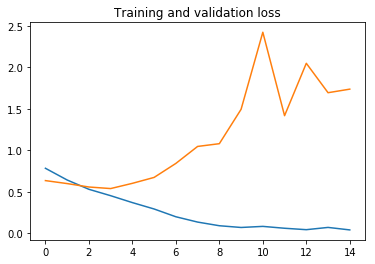

<Figure size 432x288 with 0 Axes>

In [16]:
# Retrieve a list of list results on training and test data sets for
# trainng epoch

acc      = history.history[   'acc'  ]
val_acc  = history.history['val_acc' ]
loss     = history.history[  'loss'  ]
val_loss = history.history['val_loss']

epochs = range(len(acc))
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.figure()


From the above plot it is observed that the training accuracy is close growing higher after 2 epochs whereas validation accuracy stays same. This is case of Overfitting on the training set.

**Overfitting** usually occurs when we train on small no. of examples and learn patterns that do not generalize to a new dataset ( in this case validation dataset )

## Cleanup. 

Cleanup the runtime variables. Terminate the kernel and free up memory resources.


In [0]:
import os, signal

os.kill( os.getpid(), signal.SIGKILL)